## 케라스 들어가기 전 원리 이해하기

In [1]:
#shape를 생각하기
import numpy as np
#어떤 데이터가 들어가서 어떤함수가 나올것인가 = sigmoid(행렬의 모양을 흐트러뜨리지 않고 그대로 출력) = 1/(1+exp(-x))
#active 함수 만들기
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [2]:
# 행렬 shape 그대로 출력하게 하기
input_x = np.random.randn(3,2)
sigmoid(input_x)

array([[0.35692793, 0.3827004 ],
       [0.19469695, 0.32650728],
       [0.69270293, 0.69542617]])

### 예시1

In [3]:
t = np.array(['monkey','cat','dog'])
t

array(['monkey', 'cat', 'dog'], dtype='<U6')

In [4]:
#숫자로 바꿔주기
t = [[0],[1],[2]]
#행렬로 만들기
t = np.array([[0],[1],[2]]) 

In [5]:
t

array([[0],
       [1],
       [2]])

In [6]:
input_x

array([[-0.58872291, -0.47810204],
       [-1.41977442, -0.72402494],
       [ 0.8127863 ,  0.82561135]])

In [7]:
w = np.random.randn(2,1)
output = np.dot(input_x,w) #를 t랑 비교해야한다

In [8]:
#원핫으로 만들어 0,1,로 표현
t = np.array([[1,0,0],[0,1,0],[0,0,1]])
t

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [9]:
t.shape 

(3, 3)

In [10]:
# 3X2 2X3 3X3 를 계산해보니
w = np.random.randn(2,3) # 2X3으로 행렬이 가야한다
output = np.dot(input_x,w)

In [11]:
output #이값을 확률값으로만들면 됨

array([[ 0.83742415,  0.1922341 , -0.60366164],
       [ 1.01348752,  0.76581263, -1.13963247],
       [-1.54439408, -0.14876679,  0.95542457]])

In [12]:
#확률값으로 만들기
def softmax(x):
    x = x - np.max(x,axis=1).reshape(-1,1)
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [13]:
softmax(output) 

array([[0.56778389, 0.29783833, 0.13437778],
       [0.52722178, 0.41155654, 0.06122168],
       [0.05807946, 0.23449619, 0.70742435]])

In [14]:
#이것의 합이 1이 나와야 함
np.sum(softmax(output),axis=1)

array([1., 1., 1.])

In [15]:
#0,1로 출력되도록 그냥 확인함 
output - np.max(output,axis=1).reshape(-1,1)

array([[ 0.        , -0.64519006, -1.44108579],
       [ 0.        , -0.24767489, -2.15311998],
       [-2.49981864, -1.10419136,  0.        ]])

In [16]:
x = output
x = x - np.max(x,axis=1).reshape(-1,1)
x

array([[ 0.        , -0.64519006, -1.44108579],
       [ 0.        , -0.24767489, -2.15311998],
       [-2.49981864, -1.10419136,  0.        ]])

In [17]:
np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

array([[0.56778389, 0.29783833, 0.13437778],
       [0.52722178, 0.41155654, 0.06122168],
       [0.05807946, 0.23449619, 0.70742435]])

In [18]:
softmax(output)

array([[0.56778389, 0.29783833, 0.13437778],
       [0.52722178, 0.41155654, 0.06122168],
       [0.05807946, 0.23449619, 0.70742435]])

In [19]:
#이제 다시 진행

In [20]:
def loss(y,t):
    return np.sum(t*np.log(y))/y.shape[0]

In [21]:
loss(softmax(output),t)

-0.5999826175185865

In [22]:
#미분하여 진행

In [23]:
#미분함수 만들기
def _diff(f,x):
    fx = f(x)
    h = 1e-7
    fxh = f(x+h)
    return (fxh - fx)/h

In [24]:
#방금 만든 함수 확인
f = lambda x: x**2
_diff(f,3)

6.000000087880153

In [25]:
#그냥 만들어봄
def f(x):
    return np.sum(x**2)

In [26]:
f(np.array([3,4]))

25

In [27]:
def _diff(f,x):
    h = 1e-7
    fx = f(x)
    fxh = f(x+h)
    return (fxh-fx)/h

In [28]:
_diff(f,np.array([3,0]))

6.000000194461563

In [29]:
def _diff(f,x):
    h = 1e-7
    fx = f(x)
    tmp_val = x
    x = tmp_val + h
    fxh = f(x)
    return (fxh-fx)/h

In [30]:
_diff(f,np.array([3,0]))

6.000000194461563

In [31]:
#loss값을 미분하여 빼줘야해 

In [32]:
np.argmax(softmax(output),axis=1)

array([0, 0, 2], dtype=int64)

In [33]:
np.argmax(t,axis=1)

array([0, 1, 2], dtype=int64)

In [34]:
#w값 구하기
#미분식 하나 만들기: 수치미분은 굉장히 느려서 해석적 미분 할거

In [35]:
#그냥확인
output

array([[ 0.83742415,  0.1922341 , -0.60366164],
       [ 1.01348752,  0.76581263, -1.13963247],
       [-1.54439408, -0.14876679,  0.95542457]])

In [36]:
#한 줄 각각 미분 
def numerical_gradient(f,x):
    h = 1e-7
    for i in range(x.size):
        fx = f(x)
        tmp_val = x[i]
        x[i] = tmp_val +h
        fxh = f(x)
        x[i] = tmp_val
        grad = (fxh-fx)/h
    return grad

In [37]:
f = lambda x :x**2
numerical_gradient(f,np.array([1.,2.,3.]))

array([0.        , 0.        , 6.00000009])

In [38]:
#중앙차본 으로 바꿀거: 함수그래프의 (상승하는 s그래프)-h, h사이 0을 중간값으로 취하면 일직선 선이 그려짐
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i in range(x.size):
        tmp_val = x[i]
        x[i] = tmp_val + h
        fxh1 = f(x)
        x[i] = tmp_val - h
        fxh2 = f(x)
        x[i] = tmp_val
        grad = (fxh1-fxh2)/2*h
    return grad

In [39]:
f = lambda x :x**2
numerical_gradient(f,np.array([1.,2.,3.]))

array([0.e+00, 0.e+00, 6.e-08])

In [40]:
f(np.array([1,2,3]))

array([1, 4, 9])

In [41]:
#zeros_like 설명
x = np.random.randn(2,3)
np.zeros((x.shape[0],x.shape[1])) #로 만들기 귀찮으니
np.zeros_like(x) #같은 값 나옴

array([[0., 0., 0.],
       [0., 0., 0.]])

In [42]:
#2D로 만들기
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i in range(grad.shape[0]):
        for j in range(grad.shape[1]):
            fx = f(x)
            tmp_val = x[i,j]
            x[i,j] = tmp_val + h
            fxh = f(x)
            grad[i,j] = (fxh-fx)/h
    return grad

In [43]:
# x가 1차원일때 2차원으로 만들기
x = np.random.randn(10,3)
x.ndim

2

In [44]:
#1차 2차 합쳐서
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    if x.ndim == 2: 
        for i in range(grad.shape[0]):
            for j in range(grad.shape[1]):
                fx = f(x[i,j])
                tmp_val = x[i,j]
                x[i,j] = tmp_val + h
                fxh = f(x[i,j])
                grad[i,j] = (fxh - fx)/h
                x[i,j] = tmp_val
        return grad
    else:
        for i in range(x.size):
            tmp_val = x[i]
            x[i] = tmp_val + h
            fxh1 = f(x[i])
            x[i] = tmp_val - h
            fxh2 = f(x[i])
            grad[i] = (fxh1-fxh2)/2*h
            x[i] = tmp_val
        return grad

In [45]:
a=np.array([[1.,2.,3.],[2.,3.,7.]])

In [46]:
#확인용

In [47]:
x = np.array([1.,2.,3.])
numerical_gradient(f,x)

array([2.e-08, 4.e-08, 6.e-08])

In [48]:
f = lambda x :x**2
numerical_gradient(f,a)

array([[ 2.0001,  4.0001,  6.0001],
       [ 4.0001,  6.0001, 14.0001]])

In [49]:
#교차 엔트로피 오차 함수
def cross_entropy_error(y,t):
    return -np.sum(t*np.log(y))/y.shape[0] # -np.sum(t*np.log(y))/len(t)

In [50]:
x = np.array([1.,2.,3.])

In [51]:
#이게 loss func이다: y값과 t값을 비교하는것.
def loss(y,t):
    return np.sum(t*np.log(y))/y.shape[0]
loss(softmax(output),t) # 미분하여

-0.5999826175185865

In [52]:
#class를 만들기
class Network:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self,x):
        return np.dot(x,self.W) #최종적으로는 x가 계속 업데이트
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [53]:
net = Network()

In [54]:
net.W #2X3행렬이 나오죠

array([[ 0.88465434, -0.04150873,  0.62496898],
       [-0.19636963,  0.72427958, -0.42684807]])

In [55]:
x = np.array([[6.,5.],[4.,3.]])
net.predict(x)

array([[4.32607789, 3.3723455 , 1.61557356],
       [2.94950847, 2.00680381, 1.21933173]])

In [56]:
#학습위해 원핫을 억지로 만들기
t = np.array([[0.,1.,0.],[1.,0.,0.]])
t

array([[0., 1., 0.],
       [1., 0., 0.]])

In [57]:
net.loss(x,t)

0.8877953888044884

In [58]:
#우리는 loss를 미분해서 경사 하강 시킬거임

In [59]:
#함수 아무거나 만들기 w들간거
def f(W):
    return net.loss(x,t)

In [60]:
numerical_gradient(f,net.W) #다시 돌려도 똑같은 값 나올거임

array([[ 1.34314667, -1.70629077,  0.36375905],
       [ 1.17953158, -1.46339329,  0.28426141]])

In [61]:
numerical_gradient(f,net.W) #목적은 얘만큼 곱해서 w을 업데이트 시킬거임
#*0.01해서

array([[ 1.34314667, -1.70629077,  0.36375905],
       [ 1.17953158, -1.46339329,  0.28426141]])

In [62]:
net.W = net.W - 0.0001*numerical_gradient(f,net.W)
numerical_gradient(f,net.W) #하면 변화가 있을거임

array([[ 1.34058528, -1.7037687 ,  0.36379895],
       [ 1.17745825, -1.46135121,  0.28429306]])

In [78]:
epochs = 10000
lr = 1e-5
for epoch in range(epochs):
    net.W = net.W - lr*numerical_gradient(f,net.W)

In [79]:
net.predict(x)

array([[-5.88669692,  7.92137775, -9.11416376],
       [-3.34516459,  5.16659893, -5.90663448]])

In [80]:
np.argmax(net.predict(x),axis=1)

array([1, 1], dtype=int64)

In [81]:
np.argmax(t,axis=1)

array([1, 0], dtype=int64)

In [83]:
#AND논리회로 network이용하여 만들기
class Network:
    def __init__(self):
        self.W = np.random.randn(2,2)
        self.b = np.random.randn(2)
    
    def predict(self,x):
        return np.dot(x,self.W) + self.b
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss
    
net = Network()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
t = np.array([[1,0],[1,0],[1,0],[0,1]]) #원핫이기 때문에 1,1로 나올수는 없다

def f(W):
    return net.loss(X,t)
    
epochs = 10000
lr = 1e-5
for epoch in range(epochs):
    net.W = net.W - lr*numerical_gradient(f,net.W)
    
np.argmax(net.predict(X),axis=1)

array([1, 1, 1, 1], dtype=int64)

In [103]:
#layer를 두개 만들기
class TwoLayerNet: #네트워크 초기화
    def __init__(self,input_size,hidden_size,output_size): #결정해서 들어갈거임
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(input_size,output_size) #두개니깐 여기서 끝
        self.W['b2'] = np.random.randn(output_size)
    
    def predict(self,x): #예측
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        
        a1 = np.dot(x,W1) + b1 #첫번쨰 출력값
        z1 = sigmoid(a1) #활성화
        a2 = np.dot(z1,W2) + b2 #활성화 된 값을 가져와 출력
        out = softmax(a2) #이것을 출력
        return out
    
    def loss(self,x,t): #손실 계산
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss
    
    def numerical_gradient(self,x,t): 
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f,self.W['W1'])
        grads['b1'] = numerical_gradient(f,self.W['b1'])
        grads['W2'] = numerical_gradient(f,self.W['W2'])
        grads['b2'] = numerical_gradient(f,self.W['b2'])
        
        return grad
    
    # def gradient_descent(self,epochs):
        
        
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc

In [104]:
model = TwoLayerNet(5,100,7)
# model.W

In [64]:
#이 데이터로 class테스트
from sklearn.datasets import load_iris

In [65]:
X = load_iris()['data']
y = load_iris()['target']

In [66]:
t = np.zeros((150,3))
for i in range(150):
    t[i,y[i]] = 1

In [67]:
print(X.shape) #input
print(t.shape) #output
input_size = X.shape[1]
hidden_size = 5
output_size = t.shape[1]

(150, 4)
(150, 3)


In [112]:
#답 비교 확인 #이상 확인
np.argmax(t,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
#train까지 넣기

In [79]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        
        a1 = np.dot(x,W1) + b1 # 출력값
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        out = softmax(a2)
        return out
    
    def loss(self,x,t): #손실계산
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        
        return grads

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def train(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.W[key] -= lr*grads[key]
                print('==========>loss ',self.loss(x,t),'=====>',self.accuracy(x,t))

In [72]:
from sklearn.model_selection import train_test_split

X = load_iris()['data']
y = load_iris()['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
t_train = np.zeros((y_train.size,np.unique(y_train).size))
for i in range(len(t_train)):
    t_train[i,y_train[i]] = 1
t_test = np.zeros((y_test.size,np.unique(y_test).size))
for i in range(len(t_test)):
    t_test[i,y_test[i]] = 1
input_size = X_train.shape[1]
hidden_size = 5
output_size = t_train.shape[1]
network = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [73]:
network.train(10000,1e-3,X,t) #60%의 정확도를 보임

==========>loss  3.7268534030686107 =====> 0.3333333333333333
==========>loss  3.7268534030681404 =====> 0.3333333333333333
==========>loss  3.7248686158599353 =====> 0.3333333333333333
==========>loss  3.724868615853608 =====> 0.3333333333333333
==========>loss  3.72273132074196 =====> 0.3333333333333333
==========>loss  3.722731320741487 =====> 0.3333333333333333
==========>loss  3.7207485977502257 =====> 0.3333333333333333
==========>loss  3.720748597743901 =====> 0.3333333333333333
==========>loss  3.7185977492255264 =====> 0.3333333333333333
==========>loss  3.7185977492250504 =====> 0.3333333333333333
==========>loss  3.716617103059898 =====> 0.3333333333333333
==========>loss  3.716617103053575 =====> 0.3333333333333333
==========>loss  3.7144525691921118 =====> 0.3333333333333333
==========>loss  3.7144525691916335 =====> 0.3333333333333333
==========>loss  3.7124740125747135 =====> 0.3333333333333333
==========>loss  3.7124740125683933 =====> 0.3333333333333333
==========>loss

In [80]:
#학습된거를 테스트??
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        
        a1 = np.dot(x,W1) + b1 # 출력값
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        out = softmax(a2)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        
        return grads

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def train(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.W[key] -= lr*grads[key]
            self.loss_val.append(self.loss(x,t))
        

In [75]:
network.train(1000,1e-3,X,t) #수치적 미분으로 굉장히 느림

==========>loss  0.8297496417076344 =====> 0.6666666666666666
==========>loss  0.8297496417076338 =====> 0.6666666666666666
==========>loss  0.8297290083512091 =====> 0.6666666666666666
==========>loss  0.829729008351195 =====> 0.6666666666666666
==========>loss  0.8297240572474891 =====> 0.6666666666666666
==========>loss  0.8297240572474881 =====> 0.6666666666666666
==========>loss  0.8297034252530577 =====> 0.6666666666666666
==========>loss  0.8297034252530437 =====> 0.6666666666666666
==========>loss  0.8296984745071171 =====> 0.6666666666666666
==========>loss  0.8296984745071162 =====> 0.6666666666666666
==========>loss  0.8296778438747219 =====> 0.6666666666666666
==========>loss  0.8296778438747078 =====> 0.6666666666666666
==========>loss  0.8296728934866059 =====> 0.6666666666666666
==========>loss  0.8296728934866049 =====> 0.6666666666666666
==========>loss  0.8296522642162897 =====> 0.6666666666666666
==========>loss  0.8296522642162757 =====> 0.6666666666666666
=========

In [76]:
network.accuracy(X,t)

0.6666666666666666

In [81]:
network.loss_val

[]

ValueError: x and y must have same first dimension, but have shapes (37975,) and (0,)

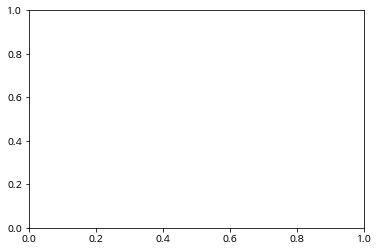

In [78]:
#그림으로 보기
import matplotlib.pyplot as plt
plt.plot(np.arange(37975),network.loss_val) #loss_val은 쭉 떨어짐, 떨어지는데 효과가 없어서 다시 학습시킬게요 

In [82]:
#softmax말고 relu일때 보기
def relu(x):
    return np.maximum(0,x)

In [83]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        
        a1 = np.dot(x,W1) + b1 # 출력값
        z1 = relu(a1)
        a2 = np.dot(z1,W2) + b2
        out = softmax(a2)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        
        return grads

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def train(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.W[key] -= lr*grads[key]
            self.loss_val.append(self.loss(x,t))
        

In [84]:
X = load_iris()['data']
y = load_iris()['target']
t = np.zeros((y.size,np.unique(y).size))
for i in range(len(t)):
    t[i,y[i]] = 1
input_size = X.shape[1]
hidden_size = 5
output_size = t.shape[1]
network = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [85]:
network.train(10000,1e-3,X,t)

In [86]:
network.accuracy(X,t) #0.98나옴

0.96

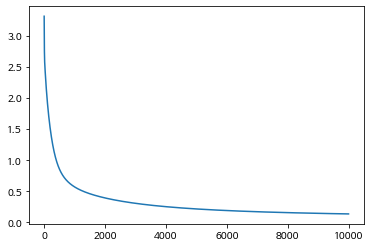

In [87]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(network.loss_val)),network.loss_val)

In [88]:
#testset으로 해보기
from sklearn.model_selection import train_test_split
X = load_iris()['data']
y = load_iris()['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

t_train = np.zeros((y_train.size,np.unique(y_train).size))
for i in range(len(t_train)):
    t_train[i,y_train[i]] = 1
t_test = np.zeros((y_test.size,np.unique(y_test).size))
for i in range(len(t_test)):
    t_test[i,y_test[i]] = 1
    
input_size = X_train.shape[1]
hidden_size = 5
output_size = t_train.shape[1]
network = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [89]:
network.train(10000,1e-3,X_test,t_test)

In [90]:
network.accuracy(X_test,t_test) #0.98잘

0.8666666666666667

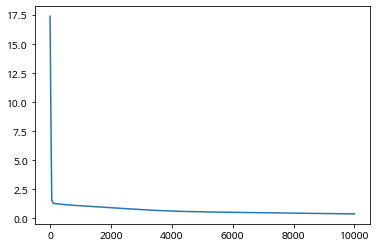

In [91]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(network.loss_val)),network.loss_val)

In [ ]:
#위에서 안되던거 가져옴

In [94]:
X = load_iris()['data']
y = load_iris()['target']
t = np.zeros((150,3)) #
for i in range(150):
    t[i,y[i]] = 1
input_size = X.shape[1]
hidden_size = 10
output_size = t.shape[1]
network = TwoLayerNet(input_size,hidden_size,output_size)

In [95]:
network.predict(X)

array([[9.99850188e-01, 6.23732872e-07, 1.49187822e-04],
       [9.99939583e-01, 3.84706484e-07, 6.00325756e-05],
       [9.99778969e-01, 1.47871066e-06, 2.19551927e-04],
       [9.99943677e-01, 4.04162963e-07, 5.59185997e-05],
       [9.99790461e-01, 8.81881035e-07, 2.08656877e-04],
       [9.99982161e-01, 3.53623388e-08, 1.78039962e-05],
       [9.99870588e-01, 7.32771942e-07, 1.28679489e-04],
       [9.99928635e-01, 3.27780645e-07, 7.10369708e-05],
       [9.99916358e-01, 7.93400276e-07, 8.28489252e-05],
       [9.99935186e-01, 4.15488773e-07, 6.43988132e-05],
       [9.99909492e-01, 2.65832647e-07, 9.02424335e-05],
       [9.99952448e-01, 2.43546314e-07, 4.73082667e-05],
       [9.99892012e-01, 8.07214228e-07, 1.07180329e-04],
       [9.98775506e-01, 1.39859497e-05, 1.21050821e-03],
       [9.99249666e-01, 1.53179788e-06, 7.48802490e-04],
       [9.99876489e-01, 1.63737541e-07, 1.23347063e-04],
       [9.99805975e-01, 4.46247423e-07, 1.93578814e-04],
       [9.99906402e-01, 3.55313

In [96]:
epochs = 10
lr = 0.00001
for epoch in range(epochs):
    grads = network.numerical_gradient(X,t)
    for key in grads.keys():
        network.W[key] -= lr*grads[key]

In [97]:
#또다른 함수로 만들어주기
def train(epochs,learning_rate,x,t):
    for epoch in range(epochs):
        grads = network.numerical_gradient(X,t)
        for key in grads.keys():
            network.W[key] -= learning_rate*grads[key]
        # print('==========> ',epoch)
        print('==========> ',network.loss(x,t), "=========>",network.accuracy(x,t))
        
train(100,0.0001,X,t)

==========>  21.910366931402006 =========> 0.3333333333333333
==========>  21.864652052649763 =========> 0.3333333333333333
==========>  21.818979880647806 =========> 0.3333333333333333
==========>  21.77335032577944 =========> 0.3333333333333333
==========>  21.72776329978934 =========> 0.3333333333333333
==========>  21.682218715247036 =========> 0.3333333333333333
==========>  21.63671648399931 =========> 0.3333333333333333
==========>  21.59125651802326 =========> 0.3333333333333333
==========>  21.54583872942728 =========> 0.3333333333333333
==========>  21.500463030451844 =========> 0.3333333333333333
==========>  21.455129333470055 =========> 0.3333333333333333
==========>  21.409837550988723 =========> 0.3333333333333333
==========>  21.364587595649194 =========> 0.3333333333333333
==========>  21.319379380228302 =========> 0.3333333333333333
==========>  21.274212817639313 =========> 0.3333333333333333
==========>  21.229087820932104 =========> 0.3333333333333333
==========>  

In [98]:
#이 train을 accuracy도 찍을 수 있도록
def train(epochs,learning_rate,x,t):
    for epoch in range(epochs):
        grads = network.numerical_gradient(x,t)
        for key in grads.keys():
            network.W[key] -= learning_rate*grads[key]
        print('==========> ',epoch,'accuracy:',network.accuracy(x,t))
        
train(100,0.00001,X,t)

==========>  0 accuracy: 0.3333333333333333
==========>  1 accuracy: 0.3333333333333333
==========>  2 accuracy: 0.3333333333333333
==========>  3 accuracy: 0.3333333333333333
==========>  4 accuracy: 0.3333333333333333
==========>  5 accuracy: 0.3333333333333333
==========>  6 accuracy: 0.3333333333333333
==========>  7 accuracy: 0.3333333333333333
==========>  8 accuracy: 0.3333333333333333
==========>  9 accuracy: 0.3333333333333333
==========>  10 accuracy: 0.3333333333333333
==========>  11 accuracy: 0.3333333333333333
==========>  12 accuracy: 0.3333333333333333
==========>  13 accuracy: 0.3333333333333333
==========>  14 accuracy: 0.3333333333333333
==========>  15 accuracy: 0.3333333333333333
==========>  16 accuracy: 0.3333333333333333
==========>  17 accuracy: 0.3333333333333333
==========>  18 accuracy: 0.3333333333333333
==========>  19 accuracy: 0.3333333333333333
==========>  20 accuracy: 0.3333333333333333
==========>  21 accuracy: 0.3333333333333333
==========>  22 accu

In [ ]:
#확인용

In [99]:
network.predict(X)

array([[9.97463174e-01, 1.38378250e-05, 2.52298826e-03],
       [9.98987990e-01, 8.22552106e-06, 1.00378488e-03],
       [9.96955000e-01, 2.60865505e-05, 3.01891343e-03],
       [9.99086815e-01, 8.29840189e-06, 9.04886173e-04],
       [9.96628504e-01, 1.86021400e-05, 3.35289361e-03],
       [9.99575939e-01, 1.12511495e-06, 4.22935687e-04],
       [9.98165486e-01, 1.33517162e-05, 1.82116247e-03],
       [9.98705127e-01, 7.72109770e-06, 1.28715178e-03],
       [9.98824868e-01, 1.39406875e-05, 1.16119143e-03],
       [9.98820618e-01, 9.65787725e-06, 1.16972408e-03],
       [9.98162209e-01, 7.18279420e-06, 1.83060803e-03],
       [9.99121533e-01, 5.79147960e-06, 8.72676002e-04],
       [9.98254686e-01, 1.65785933e-05, 1.72873497e-03],
       [9.87712157e-01, 1.76430635e-04, 1.21114127e-02],
       [9.87226600e-01, 3.57784631e-05, 1.27376219e-02],
       [9.97653174e-01, 4.54690062e-06, 2.34227959e-03],
       [9.96833517e-01, 9.83356844e-06, 3.15664942e-03],
       [9.98417688e-01, 7.87871

In [100]:
network.predict(X[[20],:]) 

array([[9.99665488e-01, 1.44728784e-06, 3.33064777e-04]])

In [101]:
#def numerical_gradient(self,x,t): 를 for문 돌리기
lr = 0.0001
epochs = 100
for epoch in range(epochs): #여러번 업데이트
    grads = network.numerical_gradient(X,t)
    W1, W2 = network.numerical_gradient(X,t)['W1'], network.numerical_gradient(X,t)['W2']
    b1, b2 = network.numerical_gradient(X,t)['b1'], network.numerical_gradient(X,t)['b2']
    network.W['W1'] -= lr*W1
    network.W['W2'] -= lr*W2
    network.W['b1'] -= lr*b1
    network.W['b2'] -= lr*b2 #까지 한번 업데이트

In [102]:
sum(np.argmax(network.predict(X),axis=1) == np.argmax(t,axis=1))/t.size

0.1111111111111111

In [103]:
train(10,1e-5,X,t)

==========>  0 accuracy: 0.3333333333333333
==========>  1 accuracy: 0.3333333333333333
==========>  2 accuracy: 0.3333333333333333
==========>  3 accuracy: 0.3333333333333333
==========>  4 accuracy: 0.3333333333333333
==========>  5 accuracy: 0.3333333333333333
==========>  6 accuracy: 0.3333333333333333
==========>  7 accuracy: 0.3333333333333333
==========>  8 accuracy: 0.3333333333333333
==========>  9 accuracy: 0.3333333333333333


In [104]:
#뭔가 이상해서 loss값 나오는거 확인해봄
def train(epochs,learning_rate,x,t):
    _loss=[]
    for epoch in range(epochs):
        grads = network.numerical_gradient(x,t)
        for key in grads.keys():
            network.W[key] -= learning_rate*grads[key]
    network.loss(x,t)
        
train(1000,1e-3,X,t)

In [105]:
np.argmax(network.predict(X),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)